In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/adult.csv')

In [6]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
data.shape

(48842, 15)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [10]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [11]:
data['workclass'].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [12]:
data['workclass'] = data['workclass'].replace('?',data['workclass'].mode()[0])

In [13]:
data['workclass'].value_counts()

,count
workclass,
Private,36705
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [15]:
data['age'].value_counts(50)

,proportion
age,
36,0.027599
35,0.027374
33,0.027333
23,0.027210
31,0.027128
...,...
88,0.000123
85,0.000102
87,0.000061


In [16]:
data['fnlwgt'].value_counts()

,count
fnlwgt,
203488,21
190290,19
120277,19
125892,18
126569,18
...,...
188488,1
285290,1
293579,1


In [17]:
data['education'].value_counts()

,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


In [19]:
data['educational-num'].value_counts()

,count
educational-num,
9,15784
10,10878
13,8025
14,2657
11,2061
7,1812
12,1601
6,1389
4,955


In [20]:
data['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


In [21]:
data['occupation'].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
?,2809
Transport-moving,2355


In [22]:
data['occupation'] = data['occupation'].replace('?',data['occupation'].mode()[0])

In [23]:
data['occupation'].value_counts()

,count
occupation,
Prof-specialty,8981
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072


In [24]:
data['relationship'].value_counts()

,count
relationship,
Husband,19716
Not-in-family,12583
Own-child,7581
Unmarried,5125
Wife,2331
Other-relative,1506


In [25]:
data['race'].value_counts()

,count
race,
White,41762
Black,4685
Asian-Pac-Islander,1519
Amer-Indian-Eskimo,470
Other,406


In [26]:
data['gender'].value_counts()

,count
gender,
Male,32650
Female,16192


In [27]:
data['capital-gain'].value_counts()

,count
capital-gain,
0,44807
15024,513
7688,410
7298,364
99999,244
...,...
1111,1
7262,1
22040,1


In [28]:
data['capital-loss'].value_counts()

,count
capital-loss,
0,46560
1902,304
1977,253
1887,233
2415,72
...,...
2465,1
2080,1
155,1


In [29]:
data['hours-per-week'].value_counts()

,count
hours-per-week,
40,22803
50,4246
45,2717
60,2177
35,1937
...,...
69,1
87,1
94,1


In [30]:
data['native-country'].value_counts()

,count
native-country,
United-States,43832
Mexico,951
?,857
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


In [31]:
data['native-country'] = data['native-country'].replace('?',data['native-country'].mode()[0])

In [32]:
data['native-country'].value_counts()

,count
native-country,
United-States,44689
Mexico,951
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151
Cuba,138


In [33]:
data['income'].value_counts()

,count
income,
<=50K,37155
>50K,11687


In [34]:
# Lets check and do necessary corrections in data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## *Data types found to be appropriate, we are not changing anything*

## **Univariate analysis - Numerical variables**

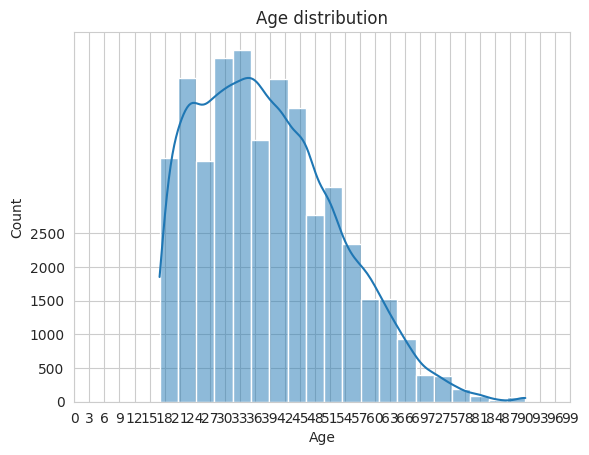

In [86]:
# Lets check the distribution of 'age'
ax = sns.histplot(data['age'],bins=20, kde=True)
ax.set_title('Age distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_xticks(np.arange(0,100,3))
ax.set_yticks(np.arange(0,3000,500))
plt.show()

- Age distribution is skewed to the right

- Minimum age in the dataset is below 18

- Maximum age is 90 years as per the dataset

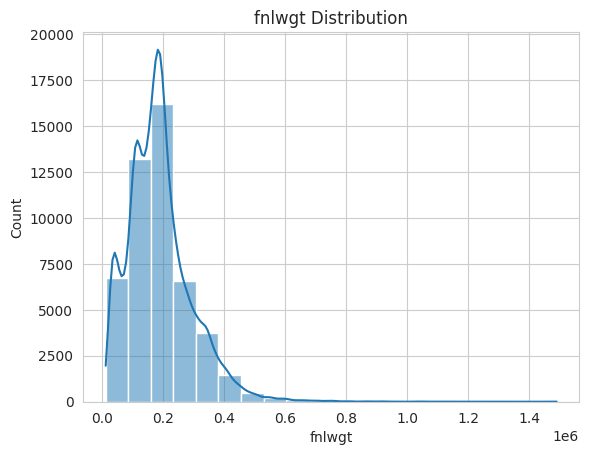

In [87]:
# Lets check the distribution of 'fnlwgt'
ax = sns.histplot(data['fnlwgt'],bins=20,kde=True)
ax.set_title('fnlwgt Distribution')
ax.set_xlabel('fnlwgt')
ax.set_ylabel('Count')
plt.show()

- fnlwgt distribution is skewed to the right

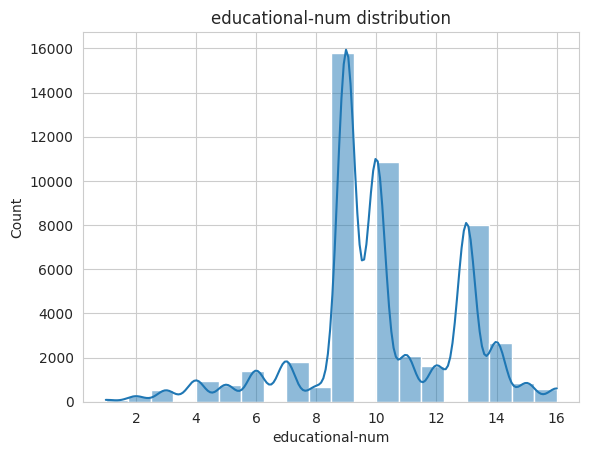

In [88]:
# Lets check the distribution of 'educational-num'
ax = sns.histplot(data['educational-num'],bins=20,kde=True)
ax.set_title('educational-num distribution')
ax.set_xlabel('educational-num')
ax.set_ylabel('Count')
plt.show()

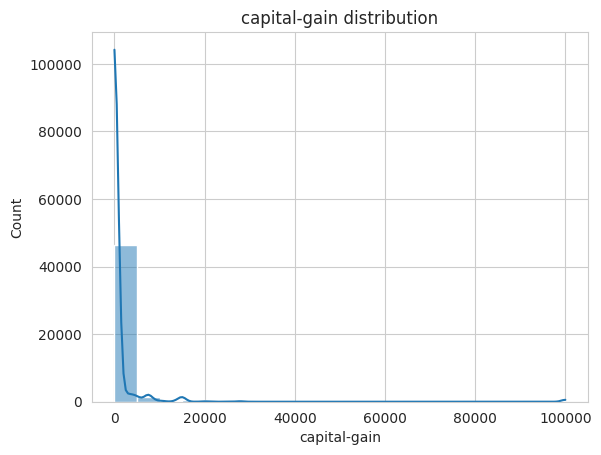

In [89]:
# Lets check the distribution of 'Capital-gain'
ax = sns.histplot(data['capital-gain'],bins=20,kde=True)
ax.set_title('capital-gain distribution')
ax.set_xlabel('capital-gain')
ax.set_ylabel('Count')
plt.show()

- Capital-gain is highly right skewed

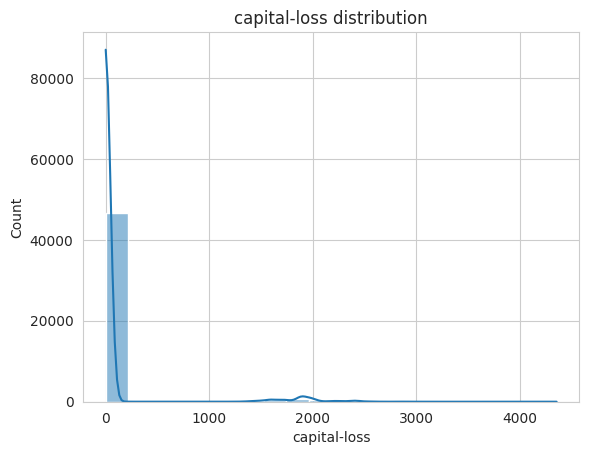

In [90]:
# Lets check the distribution of 'Capital-loss'
ax = sns.histplot(data['capital-loss'],bins=20,kde=True)
ax.set_title('capital-loss distribution')
ax.set_xlabel('capital-loss')
ax.set_ylabel('Count')
plt.show()

- Capital-loss is highly right skewed

## **Univariate Analysis - Categorical variables**

<ipython-input-76-bc9d9f630374>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='workclass', data=data, palette=palette, order=data['workclass'].value_counts().index)


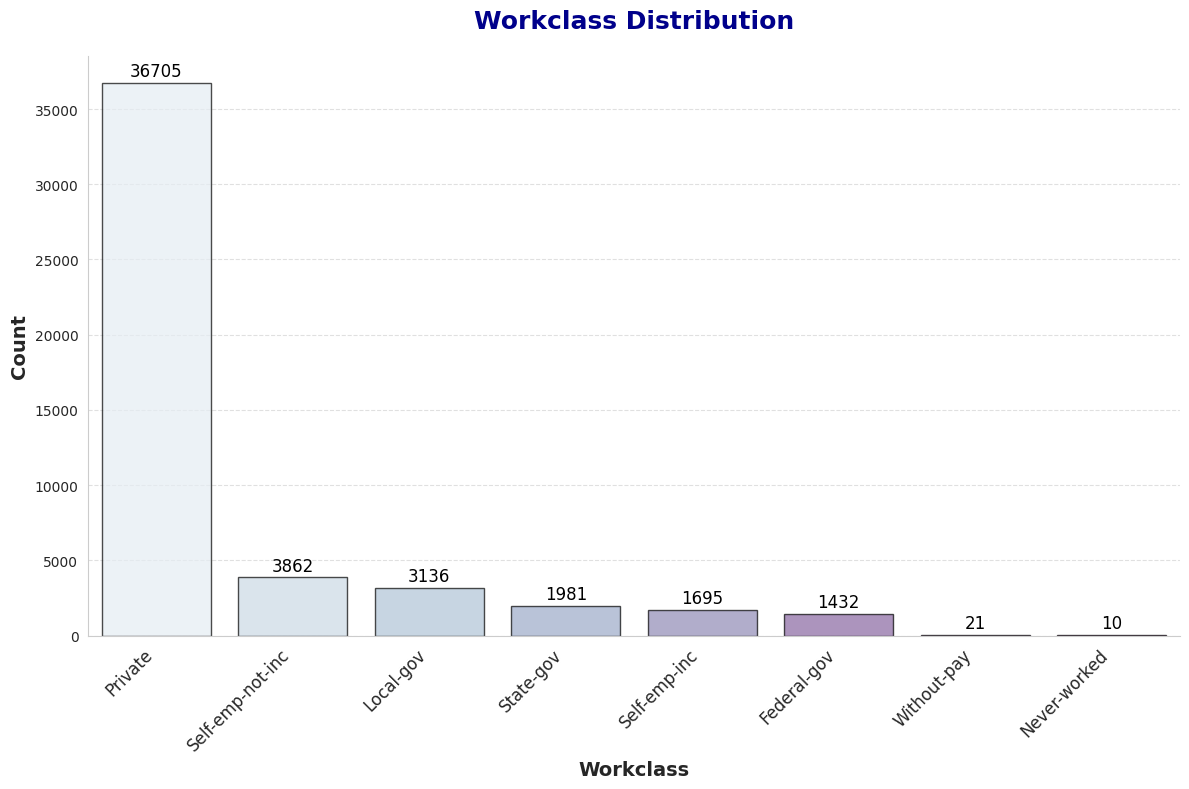

In [76]:
# Set a style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("BuPu", len(data['workclass'].unique()))

# Create the countplot with customizations
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='workclass', data=data, palette=palette, order=data['workclass'].value_counts().index)
ax.set_title('Workclass Distribution', fontsize=18, fontweight='bold', color='darkblue', pad=20)
plt.xticks(rotation=45, fontsize=12, ha='right')
ax.set_xlabel('Workclass', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Optional: Add a background gradient to bars
for i, bar in enumerate(ax.patches):
    bar.set_alpha(0.7)
    bar.set_edgecolor("black")

# Remove top and right spines (optional, for a cleaner look)
sns.despine(top=True, right=True)

# Add gridlines only for y-axis
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show();

- From the above plot, we see that the majority of the people are working in private sector,
- Least number of people work in Federal government,
- 21 people in the dataset are without pay,
- 10 people never worked

<ipython-input-79-a6831a192c78>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='education', data=data, palette=palette, order=data['education'].value_counts().index)


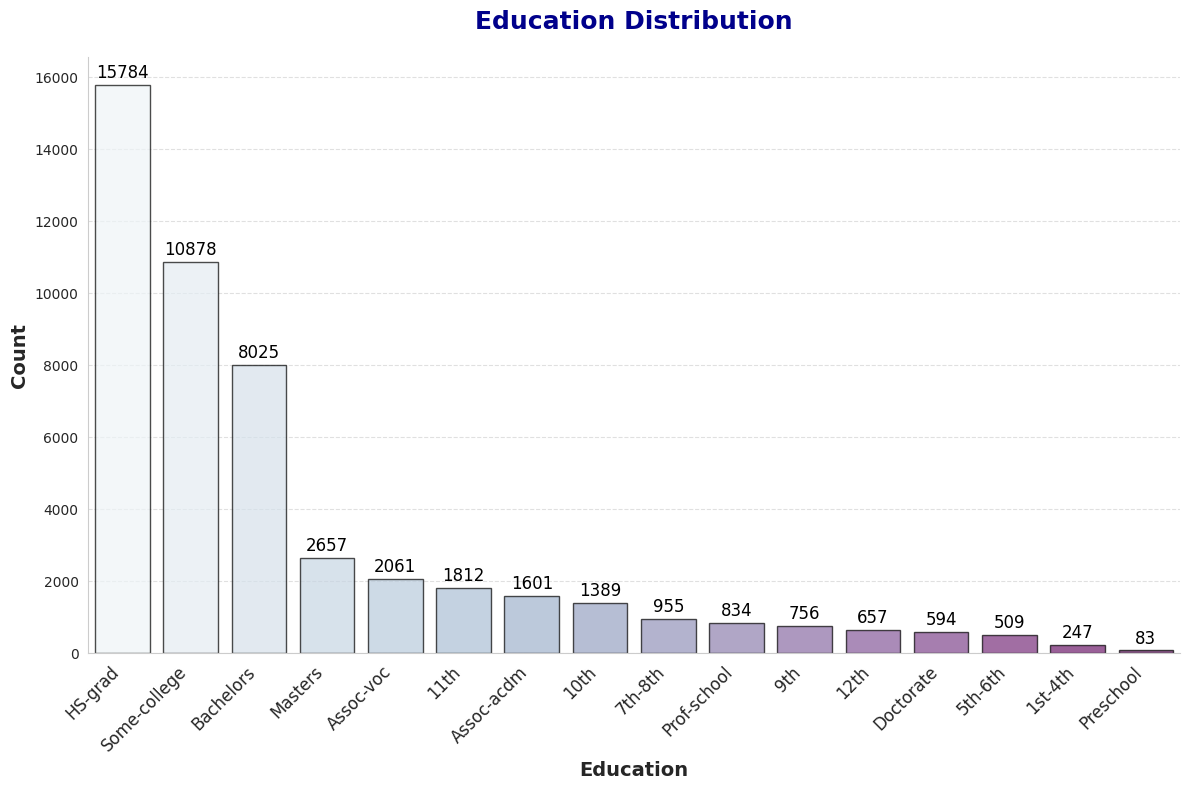

In [79]:
# Set a style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("BuPu", len(data['education'].unique()))

# Create the countplot with customizations
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='education', data=data, palette=palette, order=data['education'].value_counts().index)
ax.set_title('Education Distribution', fontsize=18, fontweight='bold', color='Darkblue', pad=20)
plt.xticks(rotation=45, fontsize=12, ha='right')
ax.set_xlabel('Education', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Optional: Add a background gradient to bars
for i, bar in enumerate(ax.patches):
    bar.set_alpha(0.7)
    bar.set_edgecolor("black")

# Remove top and right spines (optional, for a cleaner look)
sns.despine(top=True, right=True)

# Add gridlines only for y-axis
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show();

- From the above plot, we see that the majority of the people have finished their high school graduation,
- Least number of people(83) have completed their pre-school level of education,
- 8025 people are with a Bachelor's degree,
- 2657 people are with a Master degree

<ipython-input-80-93d78c0d9b64>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='marital-status', data=data, palette=palette, order=data['marital-status'].value_counts().index)


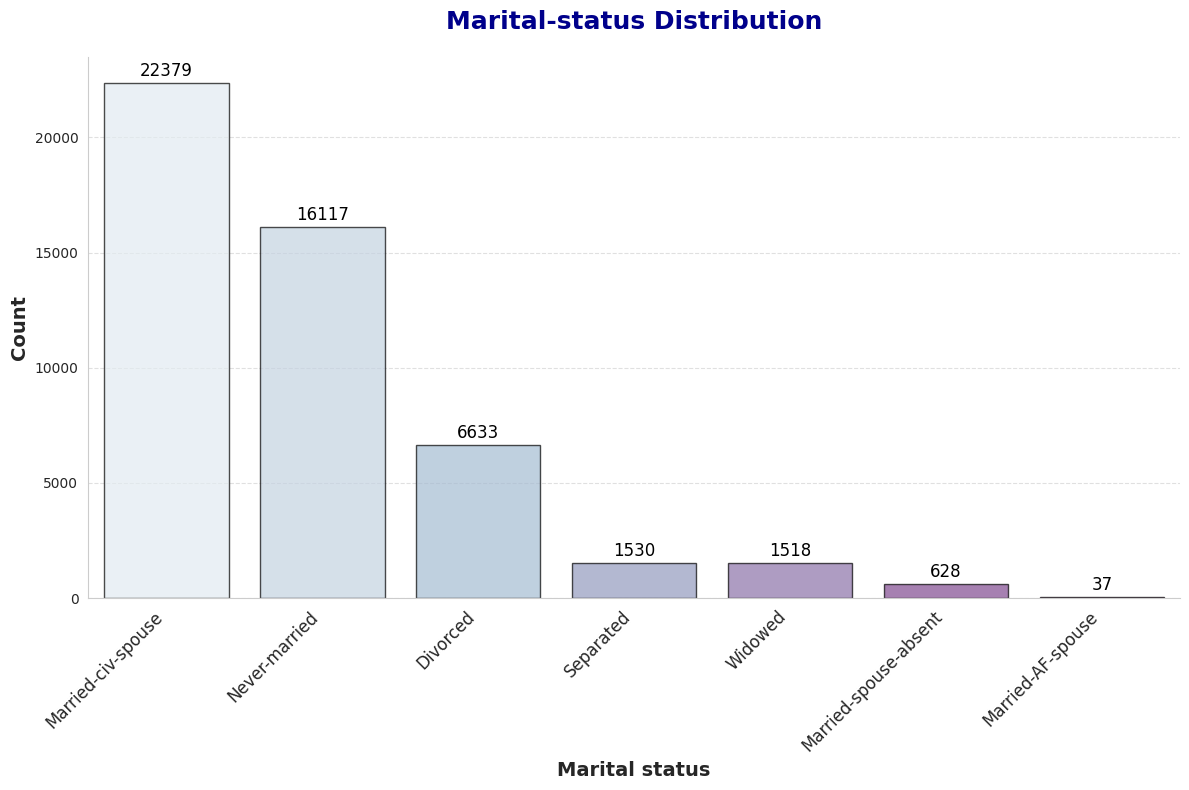

In [80]:
# Set a style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("BuPu", len(data['marital-status'].unique()))

# Create the countplot with customizations
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='marital-status', data=data, palette=palette, order=data['marital-status'].value_counts().index)
ax.set_title('Marital-status Distribution', fontsize=18, fontweight='bold', color='Darkblue', pad=20)
plt.xticks(rotation=45, fontsize=12, ha='right')
ax.set_xlabel('Marital status', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Optional: Add a background gradient to bars
for i, bar in enumerate(ax.patches):
    bar.set_alpha(0.7)
    bar.set_edgecolor("black")

# Remove top and right spines (optional, for a cleaner look)
sns.despine(top=True, right=True)

# Add gridlines only for y-axis
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show();

<ipython-input-82-5c2163bfdbe8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='occupation', data=data, palette=palette, order=data['occupation'].value_counts().index)


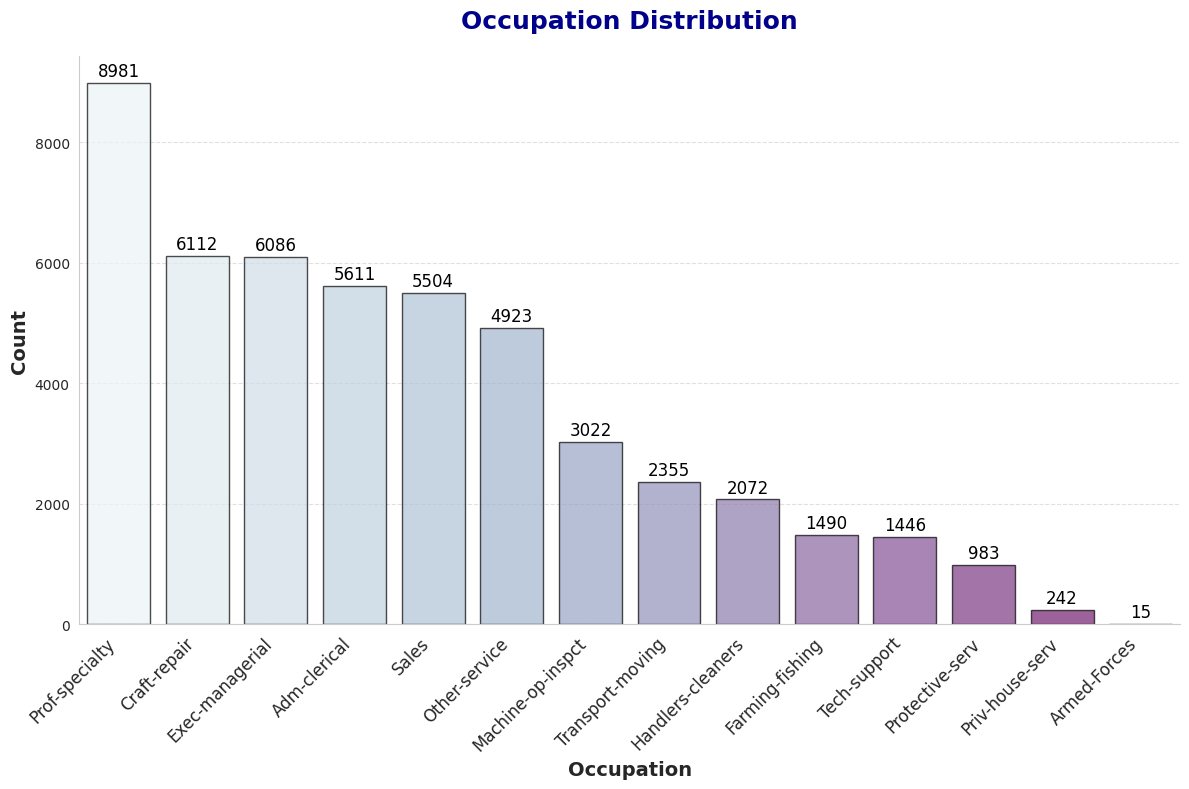

In [82]:
# Set a style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("BuPu", len(data['occupation'].unique()))

# Create the countplot with customizations
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='occupation', data=data, palette=palette, order=data['occupation'].value_counts().index)
ax.set_title('Occupation Distribution', fontsize=18, fontweight='bold', color='Darkblue', pad=20)
plt.xticks(rotation=45, fontsize=12, ha='right')
ax.set_xlabel('Occupation', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Optional: Add a background gradient to bars
for i, bar in enumerate(ax.patches):
    bar.set_alpha(0.7)
    bar.set_edgecolor("black")

# Remove top and right spines (optional, for a cleaner look)
sns.despine(top=True, right=True)

# Add gridlines only for y-axis
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show();

<ipython-input-84-cccd0d6f9181>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='relationship', data=data, palette=palette, order=data['relationship'].value_counts().index)


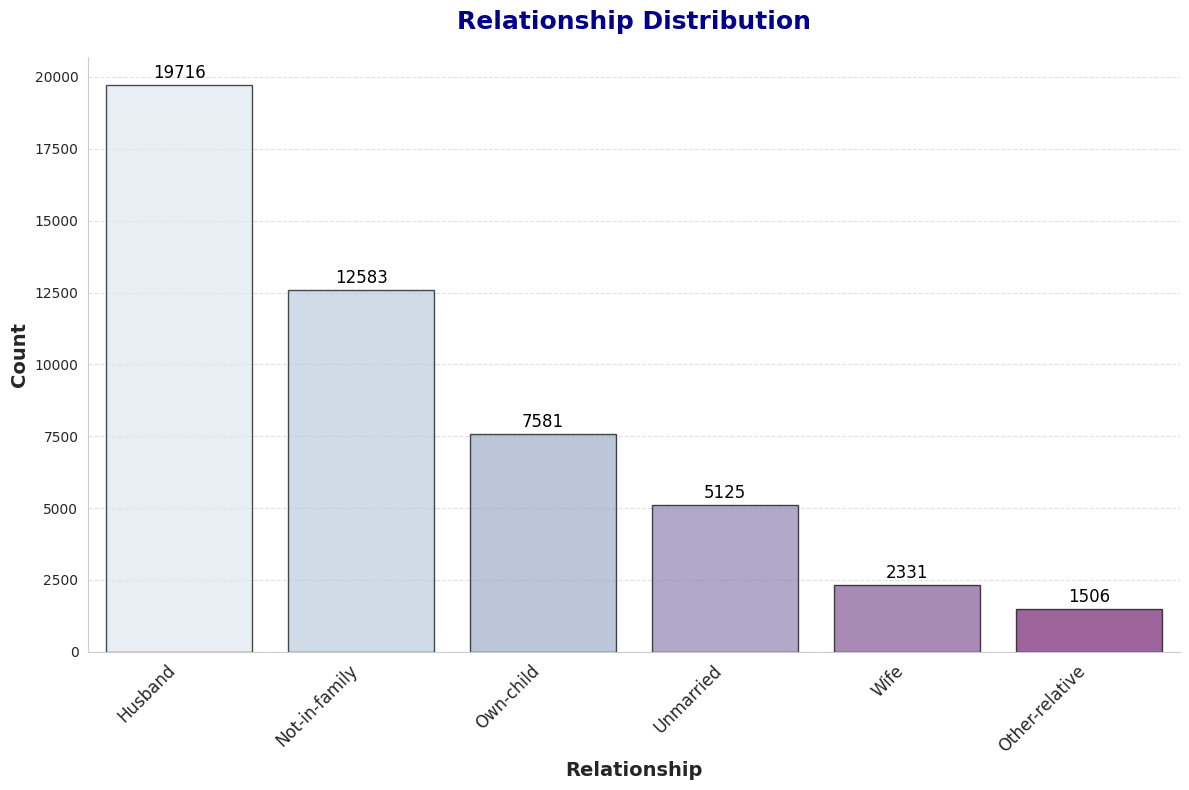

In [84]:
# Set a style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("BuPu", len(data['relationship'].unique()))

# Create the countplot with customizations
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='relationship', data=data, palette=palette, order=data['relationship'].value_counts().index)
ax.set_title('Relationship Distribution', fontsize=18, fontweight='bold', color='Darkblue', pad=20)
plt.xticks(rotation=45, fontsize=12, ha='right')
ax.set_xlabel('Relationship', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Optional: Add a background gradient to bars
for i, bar in enumerate(ax.patches):
    bar.set_alpha(0.7)
    bar.set_edgecolor("black")

# Remove top and right spines (optional, for a cleaner look)
sns.despine(top=True, right=True)

# Add gridlines only for y-axis
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show();

<ipython-input-85-c834308f3bfe>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='race', data=data, palette=palette, order=data['race'].value_counts().index)


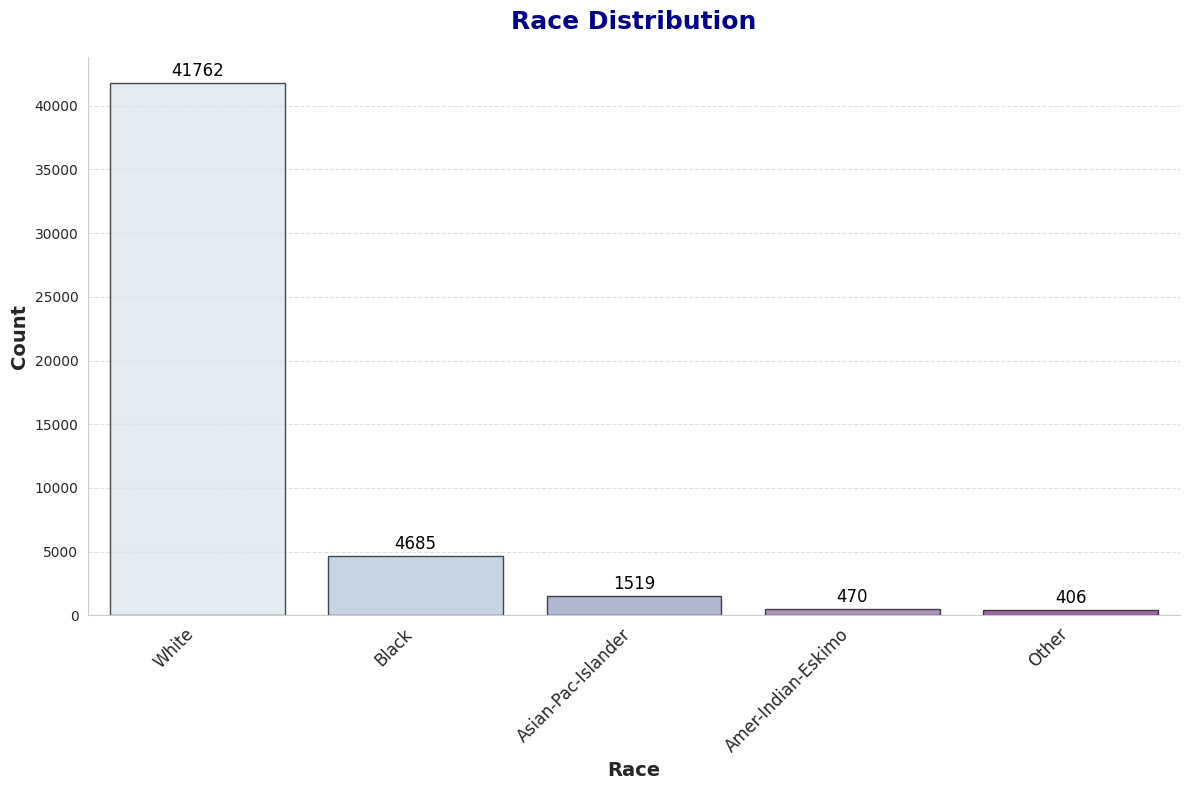

In [85]:
# Set a style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("BuPu", len(data['race'].unique()))

# Create the countplot with customizations
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='race', data=data, palette=palette, order=data['race'].value_counts().index)
ax.set_title('Race Distribution', fontsize=18, fontweight='bold', color='Darkblue', pad=20)
plt.xticks(rotation=45, fontsize=12, ha='right')
ax.set_xlabel('Race', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Optional: Add a background gradient to bars
for i, bar in enumerate(ax.patches):
    bar.set_alpha(0.7)
    bar.set_edgecolor("black")

# Remove top and right spines (optional, for a cleaner look)
sns.despine(top=True, right=True)

# Add gridlines only for y-axis
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show();

<ipython-input-91-890643cdff7f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='gender', data=data, palette=palette, order=data['gender'].value_counts().index)


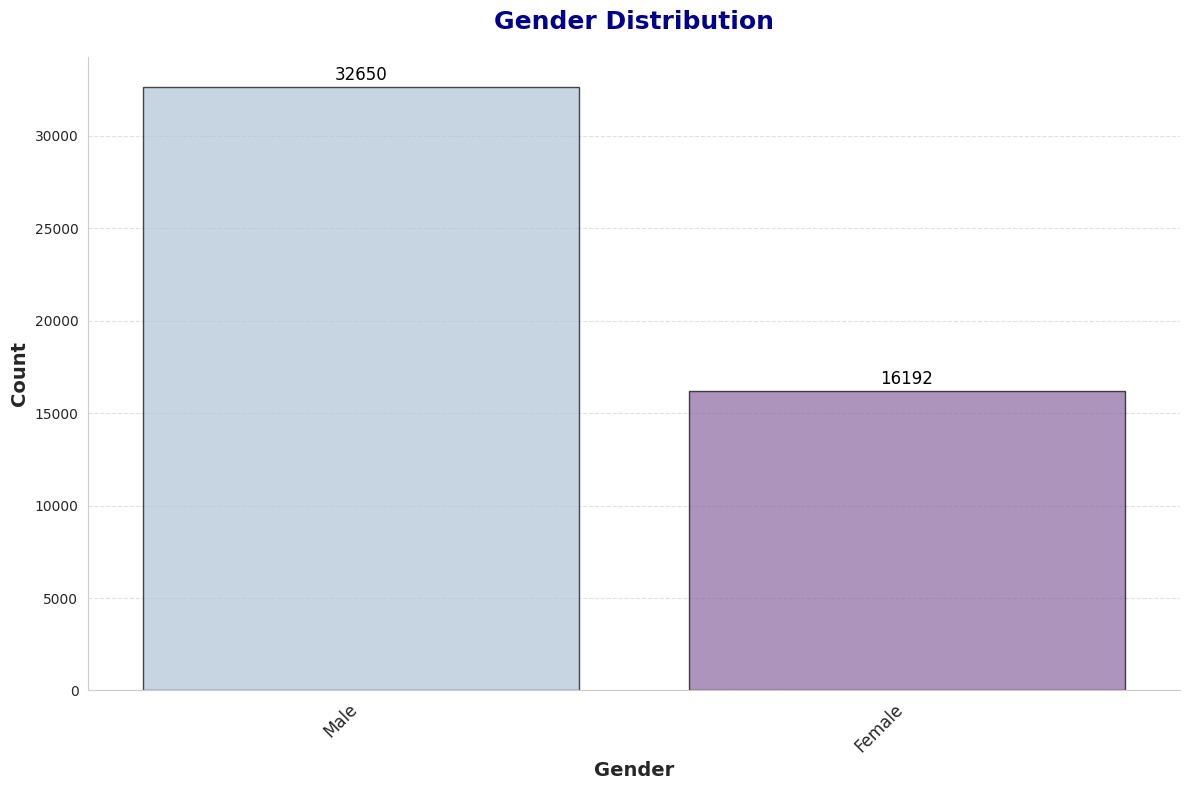

In [91]:
# Set a style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("BuPu", len(data['gender'].unique()))

# Create the countplot with customizations
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='gender', data=data, palette=palette, order=data['gender'].value_counts().index)
ax.set_title('Gender Distribution', fontsize=18, fontweight='bold', color='Darkblue', pad=20)
plt.xticks(rotation=45, fontsize=12, ha='right')
ax.set_xlabel('Gender', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Optional: Add a background gradient to bars
for i, bar in enumerate(ax.patches):
    bar.set_alpha(0.7)
    bar.set_edgecolor("black")

# Remove top and right spines (optional, for a cleaner look)
sns.despine(top=True, right=True)

# Add gridlines only for y-axis
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show();

<ipython-input-94-e3c3fd7d3a52>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='native-country', data=data, palette=palette, order=data['native-country'].value_counts().index)


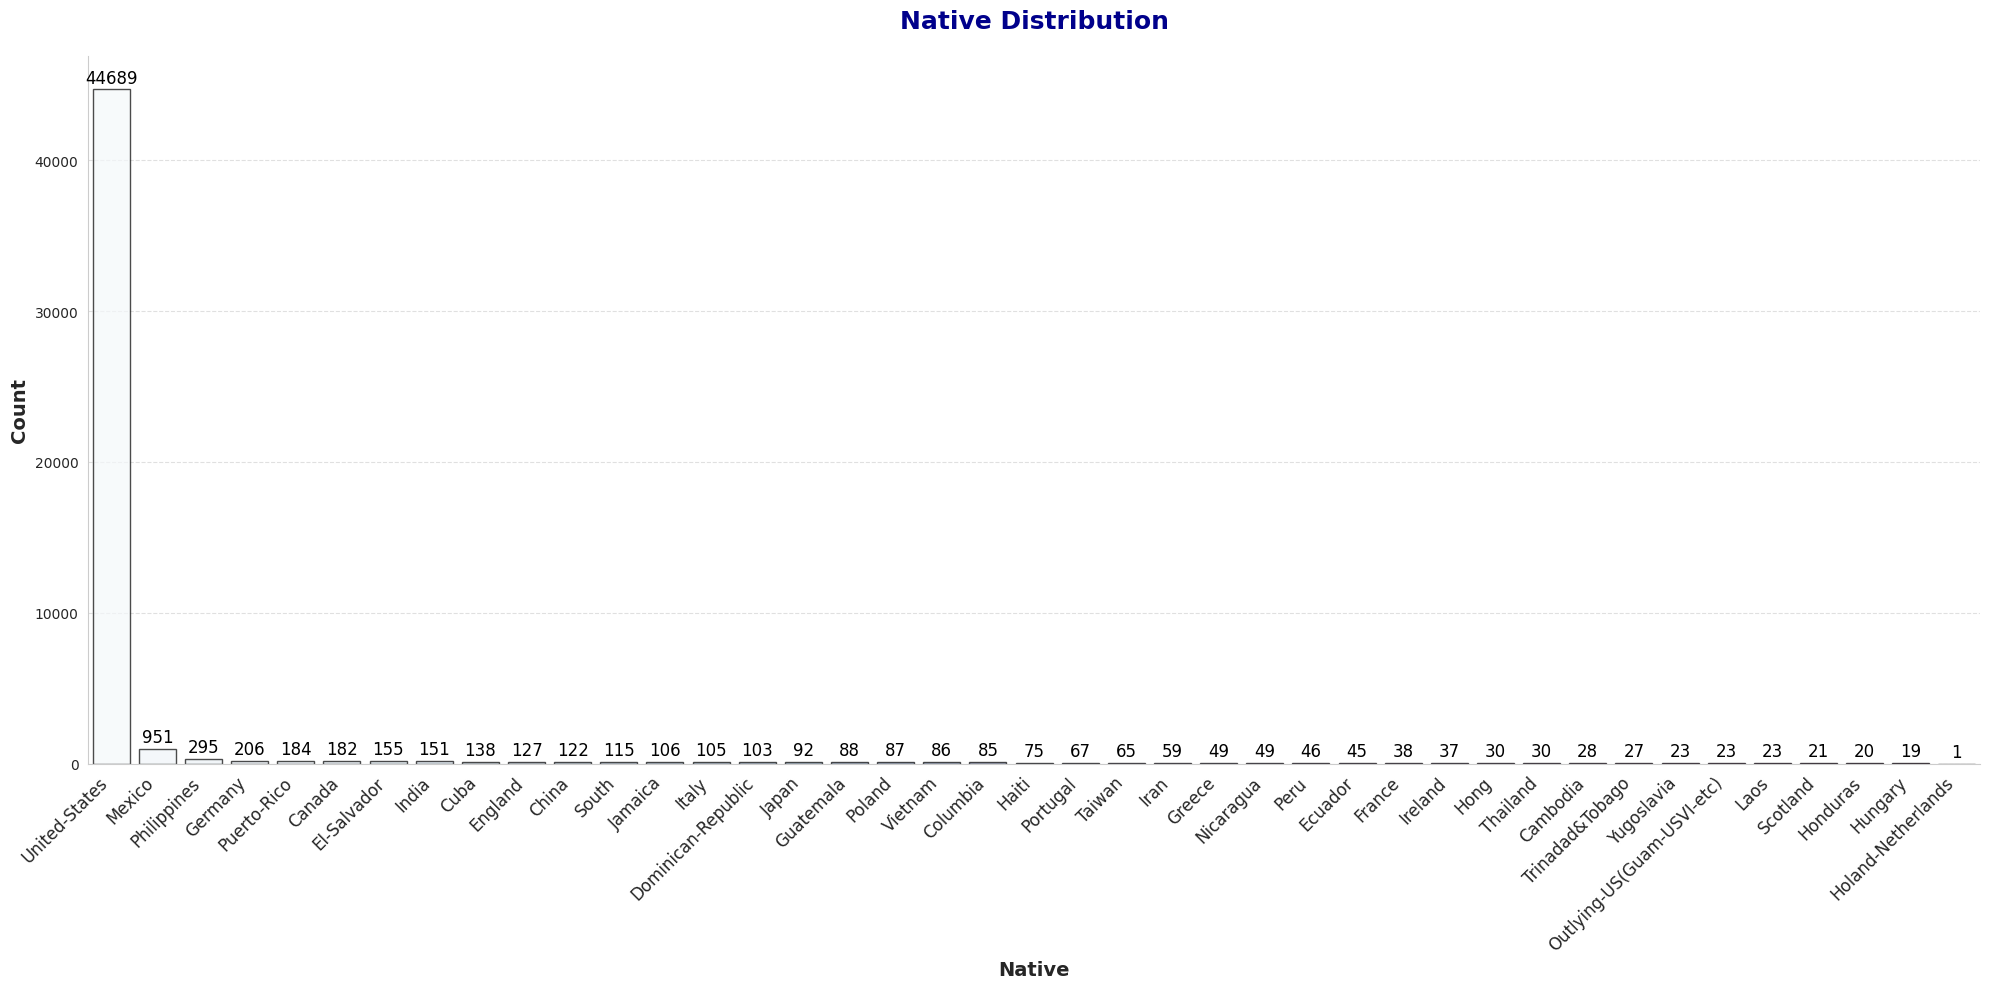

In [94]:
# Set a style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("BuPu", len(data['native-country'].unique()))

# Create the countplot with customizations
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='native-country', data=data, palette=palette, order=data['native-country'].value_counts().index)
ax.set_title('Native Distribution', fontsize=18, fontweight='bold', color='Darkblue', pad=20)
plt.xticks(rotation=45, fontsize=12, ha='right')
ax.set_xlabel('Native', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Optional: Add a background gradient to bars
for i, bar in enumerate(ax.patches):
    bar.set_alpha(0.7)
    bar.set_edgecolor("black")

# Remove top and right spines (optional, for a cleaner look)
sns.despine(top=True, right=True)

# Add gridlines only for y-axis
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show();

<ipython-input-96-db04165f2f7e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='income', data=data, palette=palette, order=data['income'].value_counts().index)


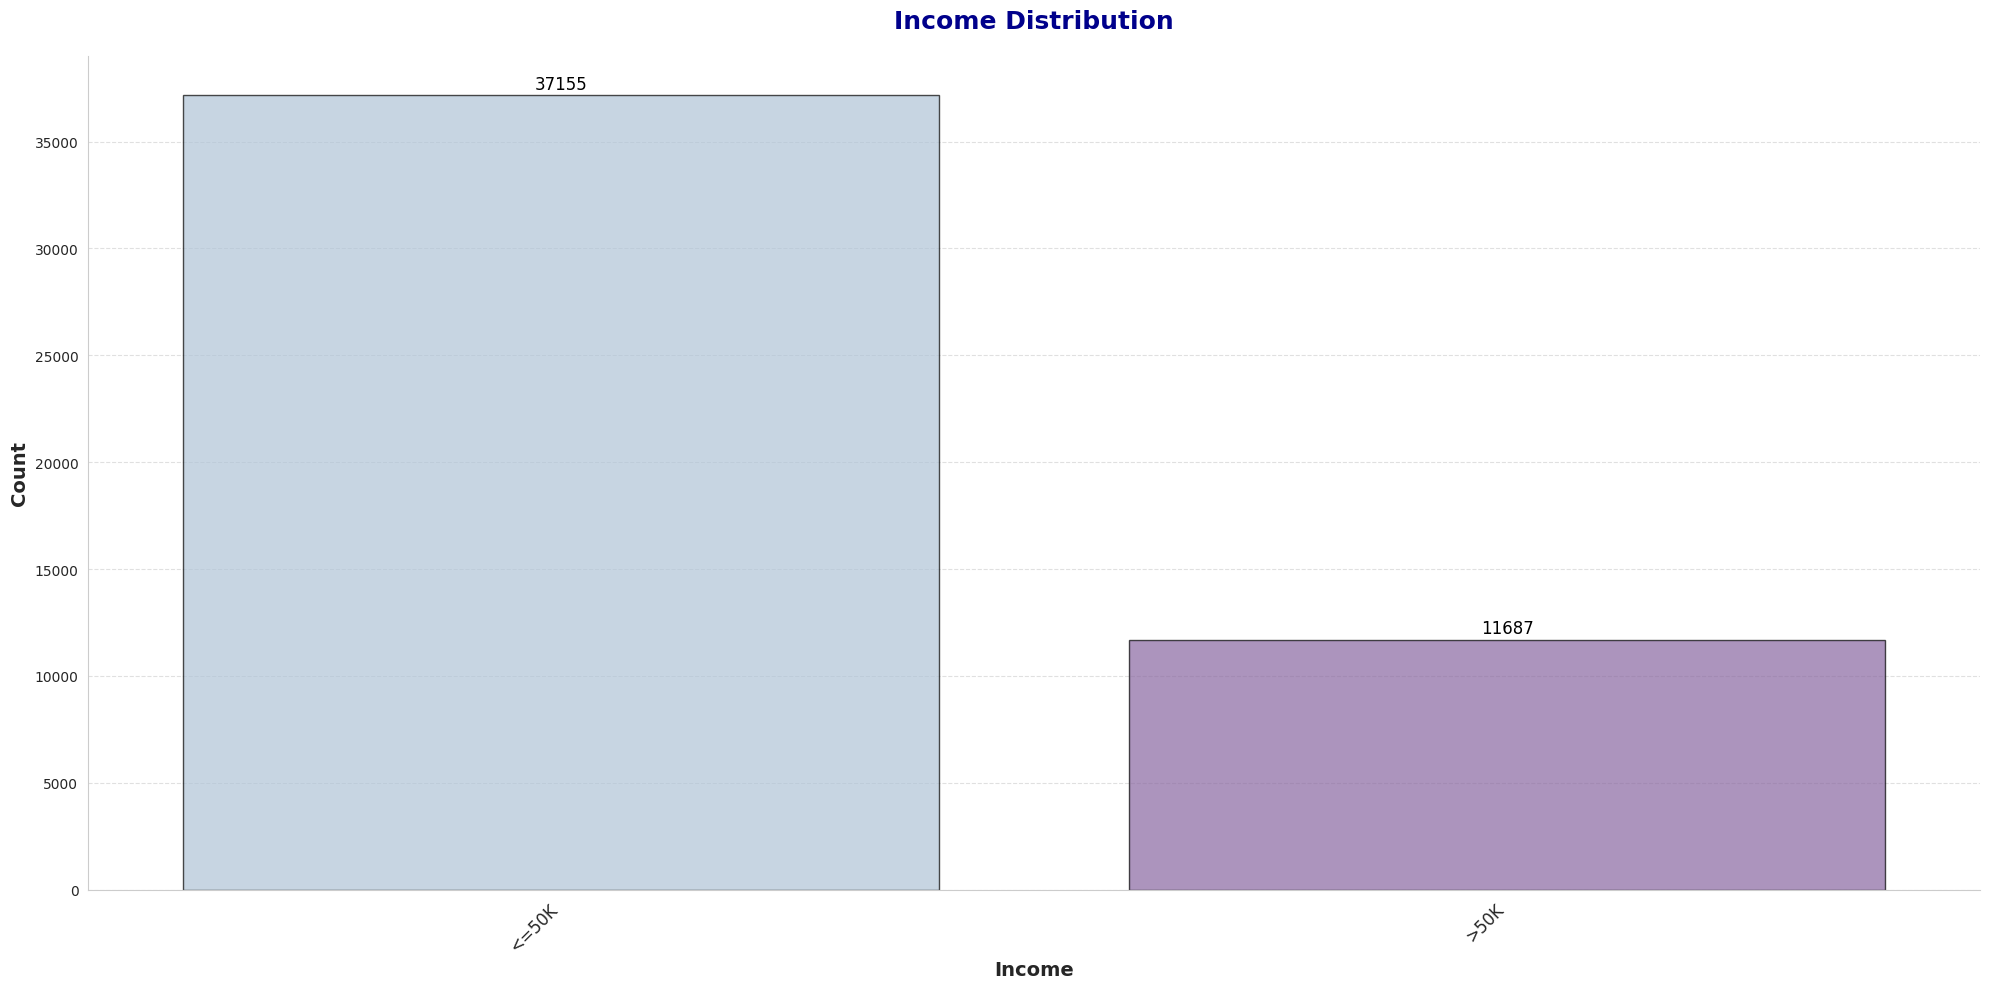

In [96]:
# Set a style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("BuPu", len(data['income'].unique()))

# Create the countplot with customizations
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='income', data=data, palette=palette, order=data['income'].value_counts().index)
ax.set_title('Income Distribution', fontsize=18, fontweight='bold', color='Darkblue', pad=20)
plt.xticks(rotation=45, fontsize=12, ha='right')
ax.set_xlabel('Income', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Optional: Add a background gradient to bars
for i, bar in enumerate(ax.patches):
    bar.set_alpha(0.7)
    bar.set_edgecolor("black")

# Remove top and right spines (optional, for a cleaner look)
sns.despine(top=True, right=True)

# Add gridlines only for y-axis
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show();

## **Bivariate Analysis**

<ipython-input-98-db3c46a5eb59>:7: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.countplot(x='gender', hue='income', data=data, palette=palette)


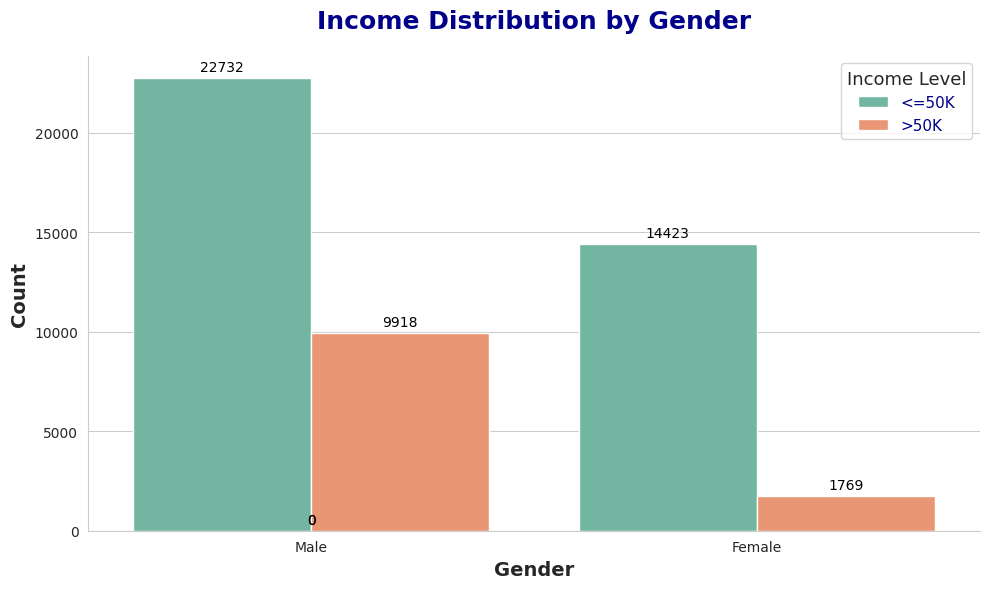

In [98]:
# Set the style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("Set2")  # Choose a visually appealing palette

# Create the countplot with hue
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue='income', data=data, palette=palette)

# Title and labels
ax.set_title('Income Distribution by Gender', fontsize=18, fontweight='bold', color='darkblue', pad=20)
ax.set_xlabel('Gender', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Label with count value
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position label
                ha='center', va='baseline',
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adjust legend
legend = ax.legend(title='Income Level', title_fontsize='13', fontsize='11', loc='upper right')
plt.setp(legend.get_texts(), color='darkblue')  # Legend text color

# Optional: Remove top and right spines for a cleaner look
sns.despine(top=True, right=True)

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-102-16d6b8785490>:7: UserWarning: 
The palette list has fewer values (8) than needed (16) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x='gender', hue='education', data=data, palette=palette)


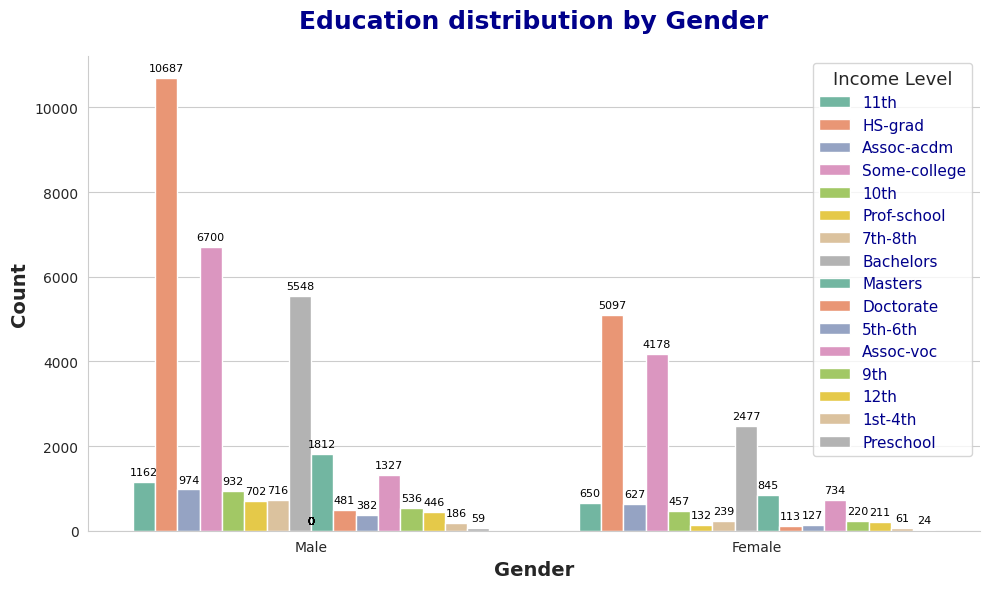

In [102]:
# Set the style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("Set2")  # Choose a visually appealing palette

# Create the countplot with hue
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue='education', data=data, palette=palette)

# Title and labels
ax.set_title('Education distribution by Gender', fontsize=18, fontweight='bold', color='darkblue', pad=20)
ax.set_xlabel('Gender', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Label with count value
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position label
                ha='center', va='baseline',
                fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adjust legend
legend = ax.legend(title='Income Level', title_fontsize='13', fontsize='11', loc='upper right')
plt.setp(legend.get_texts(), color='darkblue')  # Legend text color

# Optional: Remove top and right spines for a cleaner look
sns.despine(top=True, right=True)

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-103-38efa7053204>:7: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.countplot(x='workclass', hue='income', data=data, palette=palette)


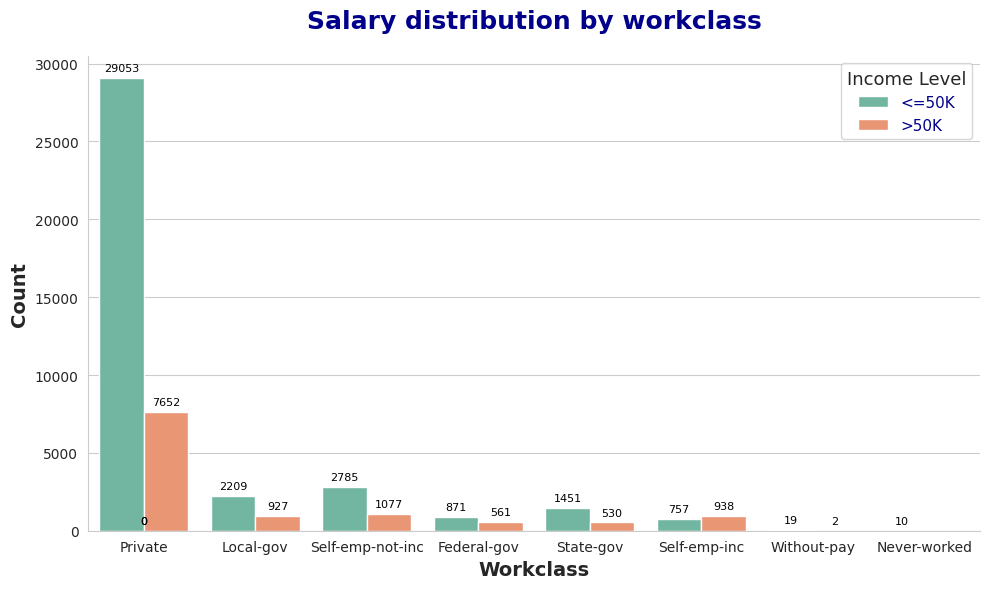

In [103]:
# Set the style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("Set2")  # Choose a visually appealing palette

# Create the countplot with hue
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='workclass', hue='income', data=data, palette=palette)

# Title and labels
ax.set_title('Salary distribution by workclass', fontsize=18, fontweight='bold', color='darkblue', pad=20)
ax.set_xlabel('Workclass', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Label with count value
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position label
                ha='center', va='baseline',
                fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adjust legend
legend = ax.legend(title='Income Level', title_fontsize='13', fontsize='11', loc='upper right')
plt.setp(legend.get_texts(), color='darkblue')  # Legend text color

# Optional: Remove top and right spines for a cleaner look
sns.despine(top=True, right=True)

# Show the plot
plt.tight_layout()
plt.show()